In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

avg_2014 = pd.read_csv('2014-average-ticket-price.csv')
jets_buyer = pd.read_csv('jets-buyer.csv')
nat_avg = pd.read_csv('national-average.csv')

avg_2014.head()


,Event,Division,"Avg TP, $"
0,Baltimore Ravens at Pittsburgh Steelers Ticket...,AFC North,202.0
1,Pittsburgh Steelers at Baltimore Ravens Ticket...,AFC North,199.0
2,Cleveland Browns at Pittsburgh Steelers Ticket...,AFC North,196.0
3,Cincinnati Bengals at Pittsburgh Steelers Tick...,AFC North,164.0
4,Pittsburgh Steelers at Cleveland Browns Ticket...,AFC North,148.0


In [2]:
# Let's start by getting some general information about this dataset.
avg_2014.info()
# There are 108 entries, but only 97 of them are non-null, and only 96 of them are complete. 
# We'll only be concerned with those.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Event      97 non-null     object 
 1   Division   96 non-null     object 
 2   Avg TP, $  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [3]:
# Let's see how many divisions we're working with.
avg_2014['Division'].unique()
# We've got 8 divisions, and some 'nan' values. Perhaps we should clean those up.


array(['AFC North', 'AFC East', 'AFC West', 'AFC South', 'NFC North',
       'NFC East', 'NFC West', 'NFC South', nan], dtype=object)

In [4]:
nan_2014 = avg_2014[avg_2014['Division'].isnull()]
nan_2014
# It looks like there are 12 null values in this dataset.
# I see that one of these entries has a non-null value for 'Event', which is consistent with what we saw
# in the info readout earlier. Let's delete these null entries.


,Event,Division,"Avg TP, $"
96,NaN,NaN,NaN
97,NaN,NaN,NaN
98,*This game was moved to Detroit due to a snow ...,NaN,NaN
99,NaN,NaN,NaN
100,NaN,NaN,NaN
101,NaN,NaN,NaN
102,NaN,NaN,NaN
103,NaN,NaN,NaN
104,NaN,NaN,NaN
105,NaN,NaN,NaN


In [5]:
avg_2014 = avg_2014[avg_2014[['Division']].notnull().all(1)]
avg_2014.info()
# Great! Next, let's look at the descriptive statistics in this dataset.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Event      96 non-null     object 
 1   Division   96 non-null     object 
 2   Avg TP, $  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


In [6]:
avg_2014.describe()
# Since we only have one numerical field (average ticket price), that's all that's descibed here.
# Out of 96 NFL events, the average ticket price is $135.23, with a standard deviation of 73.35 (that's a lot!),
# a minimum of $29 and a maximum of $423 (dang!).


,"Avg TP, $"
count,96.000000
mean,135.229167
std,73.352283
min,29.000000
25%,79.250000
50%,121.500000
75%,199.500000
max,423.000000


<AxesSubplot:>

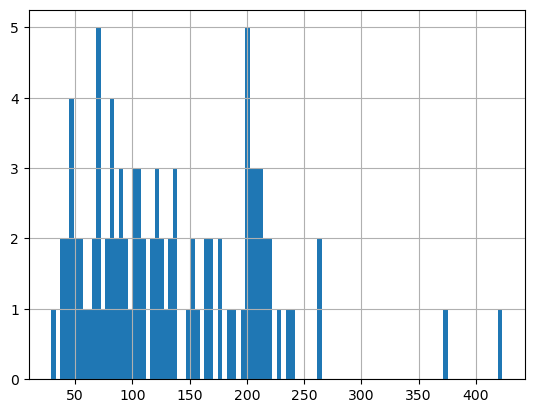

In [7]:
# Now let's look at a histogram to see the distribution.
avg_2014['Avg TP, $'].hist(bins=100)
# That's very interesting! You can see that anything above $250 is very clearly an outlier.
# There appear to be 2 major peaks, at around $70 and $200.


In [8]:
# This next dataset is about all buyers of tickets to Jets games in 2014.
jets_buyer.head()
# Hmmm, this csv looks sloppily made. Let's investigate further. What's going on here....?


,Raiders at Jets 9/7/14,Unnamed: 1,Unnamed: 2
0,ADDR_STATE,% Sales,% Ticket Sold
1,NY,47%,45%
2,NJ,28%,31%
3,CT,5%,5%
4,PA,4%,4%


In [9]:
jets_buyer.describe()


,Raiders at Jets 9/7/14,Unnamed: 1,Unnamed: 2
count,55,48,48
unique,18,22,20
top,ADDR_STATE,% Sales,% Ticket Sold
freq,8,8,8


In [10]:
jets_buyer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Raiders at Jets 9/7/14  55 non-null     object
 1   Unnamed: 1              48 non-null     object
 2   Unnamed: 2              48 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [11]:
jets_buyer['Raiders at Jets 9/7/14'].unique()
# This looks like it might be several sub-tables all jammed together in an unorganized fashion.
# I'm going to go organize it properly in Excel and come back with a new csv to analyze.


array(['ADDR_STATE', 'NY', 'NJ', 'CT', 'PA', 'CA', nan,
       'Bears at Jets 9/22/14', 'IL', 'Lions at Jets 9/28/14', 'MI',
       'Broncos at Jets 10/12/14', 'QC', 'Bills at Jets 10/26/14',
       'Steelers at Jets 11/09/14', 'Miami at Jets 12/01/14', 'FL',
       'Patiots at Jets 12/21/14', 'MA'], dtype=object)

In [12]:
new_jets = pd.read_csv('jets_buyer_new.csv')
new_jets.head()


,Event,Date,ADDR_STATE,% Sales,% Ticket Sold
0,Raiders at Jets,9/7/14,NY,47%,45%
1,Raiders at Jets,9/7/14,NJ,28%,31%
2,Raiders at Jets,9/7/14,CT,5%,5%
3,Raiders at Jets,9/7/14,PA,4%,4%
4,Raiders at Jets,9/7/14,CA,3%,3%


In [13]:
# Much better for analysis!
# Ok, let's see what percentage of each Jets event belongs to New Yorkers..
new_jets[new_jets['ADDR_STATE']=='NY'].sort_values(by='% Ticket Sold', ascending=False)
# This dataset is all for home-games for the Jets, so it looks like Jets fans were most interested in Jets v Bills
# and least interested in Jets v Miami and Jets v Patriots, both in December.


,Event,Date,ADDR_STATE,% Sales,% Ticket Sold
20,Bills at Jets,10/26/14,NY,55%,56%
10,Lions at Jets,9/28/14,NY,49%,49%
0,Raiders at Jets,9/7/14,NY,47%,45%
15,Broncos at Jets,10/12/14,NY,44%,45%
5,Bears at Jets,9/22/14,NY,43%,43%
25,Steelers at Jets,11/09/14,NY,39%,40%
30,Miami at Jets,12/01/14,NY,37%,38%
35,Patriots at Jets,12/21/14,NY,38%,38%


In [14]:
# Let's see who's the next biggest fan of the Jets, outside of New Yorkers
new_jets['% Ticket Sold'] = new_jets['% Ticket Sold'].str.replace('%', '')
new_jets['% Ticket Sold'] = new_jets['% Ticket Sold'].astype(int)
new_jets[new_jets['ADDR_STATE']!='NY'].sort_values(by='% Ticket Sold', ascending=False)
# No surprise here! New Jersey neighbors are the second biggest fans by a landslide.


,Event,Date,ADDR_STATE,% Sales,% Ticket Sold
31,Miami at Jets,12/01/14,NJ,35%,38
1,Raiders at Jets,9/7/14,NJ,28%,31
26,Steelers at Jets,11/09/14,NJ,28%,30
11,Lions at Jets,9/28/14,NJ,25%,28
6,Bears at Jets,9/22/14,NJ,25%,28
16,Broncos at Jets,10/12/14,NJ,23%,24
36,Patriots at Jets,12/21/14,NJ,24%,23
21,Bills at Jets,10/26/14,NJ,23%,23
37,Patriots at Jets,12/21/14,CT,9%,9
28,Steelers at Jets,11/09/14,PA,8%,9


In [15]:
# Now let's look at the National average dataset
nat_avg.head()


,Genre,"Avg TP, $"
0,Arizona Cardinals Tickets,109
1,Atlanta Falcons Tickets,99
2,Baltimore Ravens Tickets,140
3,Buffalo Bills Tickets,79
4,Carolina Panthers Tickets,107


In [16]:
# Let's put it in descending order of average ticket price.
nat_avg = nat_avg.sort_values('Avg TP, $', ascending=False)


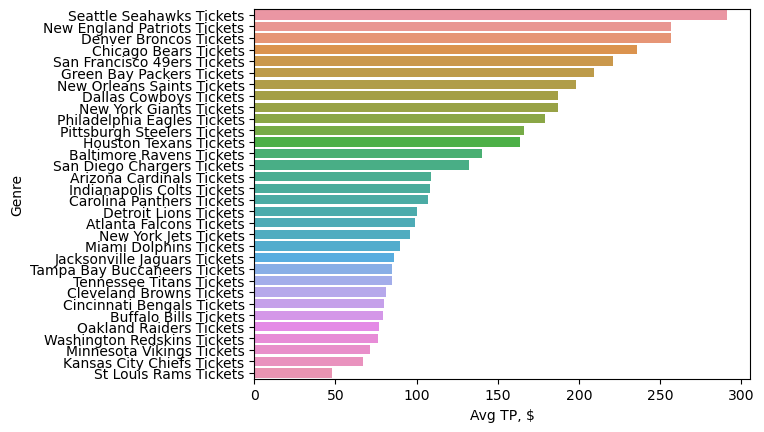

In [18]:
sns.barplot(data=nat_avg, x='Avg TP, $', y='Genre').figure.savefig("avg_tp_per_team.png")
# Looks like the KC Chiefs tickets are second cheapest.
# I wonder how much this correlates to cost of living in different parts of the country.


In [19]:
# 2014 cost of living data from https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2014&region=021
col_2014 = pd.read_csv('COL.csv')
col_2014.head()


,Rank,City,Unnamed: 2,Unnamed: 3,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Honolulu,HI,United States,106.3,69.6,88.5,136.8,79.0,80.7
1,2,Washington,DC,United States,100.4,71.5,86.3,103.0,94.9,106.6
2,3,New York,NY,United States,100.0,100.0,100.0,100.0,100.0,100.0
3,4,Barrie,Canada,NaN,99.7,29.3,65.5,104.7,78.3,92.8
4,5,Halifax,Canada,NaN,99.3,39.1,70.1,122.1,76.2,95.4


In [20]:
# Let's remove all of the Canadian listings, then we'll focus on the relevant cities.
col_2014 = col_2014[col_2014['Unnamed: 3'] != 'Canada']
col_2014 = col_2014[col_2014['Unnamed: 2'] != 'Canada']
# col_2014.head()
col_2014['Unnamed: 3'].unique()
# Looks like we removed all of the Canadian values, so I'll delete the country column and rename the state column.


array(['United States'], dtype=object)

In [21]:
del col_2014['Unnamed: 3']
col_2014 = col_2014.rename(columns={'Unnamed: 2': 'State'})
col_2014.head()


,Rank,City,State,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Honolulu,HI,106.3,69.6,88.5,136.8,79.0,80.7
1,2,Washington,DC,100.4,71.5,86.3,103.0,94.9,106.6
2,3,New York,NY,100.0,100.0,100.0,100.0,100.0,100.0
5,6,Anchorage,AK,99.0,44.6,72.5,106.4,85.1,165.8
9,10,San Francisco,CA,93.7,95.0,94.3,109.2,87.2,103.9


In [22]:
# Great! Now I'm going gather all of the city names from the relevant teams to cross-reference.
nat_avg['Genre'].str.replace('Tickets','').str.strip().tolist()


['Seattle Seahawks',
 'New England Patriots',
 'Denver Broncos',
 'Chicago Bears',
 'San Francisco 49ers',
 'Green Bay Packers',
 'New Orleans Saints',
 'Dallas Cowboys',
 'New York Giants',
 'Philadelphia Eagles',
 'Pittsburgh Steelers',
 'Houston Texans',
 'Baltimore Ravens',
 'San Diego Chargers',
 'Arizona Cardinals',
 'Indianapolis Colts',
 'Carolina Panthers',
 'Detroit Lions',
 'Atlanta Falcons',
 'New York Jets',
 'Miami Dolphins',
 'Jacksonville Jaguars',
 'Tampa Bay Buccaneers',
 'Tennessee Titans',
 'Cleveland Browns',
 'Cincinnati Bengals',
 'Buffalo Bills',
 'Oakland Raiders',
 'Washington Redskins',
 'Minnesota Vikings',
 'Kansas City Chiefs',
 'St Louis Rams']

In [23]:
# Ok, just used the above list to make a new csv of teams and locations.
team_loc = pd.read_csv('team_loc.csv')
# team_loc.head()
# Let's clean up the Team column a bit.
team_loc['Team'] = team_loc['Team'].str.replace("'", "").str.replace(",","")
team_loc.head()


,Team,City,State
0,Seattle Seahawks,Seattle,WA
1,New England Patriots,Boston,MA
2,Denver Broncos,Denver,CO
3,Chicago Bears,Chicago,IL
4,San Francisco 49ers,San Francisco,CA


In [24]:
team_loc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    32 non-null     object
 1   City    32 non-null     object
 2   State   32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [25]:
# Now we can merge team_loc with col_2014 to make a new dataset exploring the cost of living where each team is located.
col_2014.merge(team_loc, how='inner', on='City')
# So it looks like only 24 of the 32 teams in question are represented in our cost of living data. 
# Still, I'd like to see how this looks when merged with the nat_avg dataset, to see how correlated
# cost of living might be with average ticket cost. Then I'll visualize it.


,Rank,City,State_x,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Team,State_y
0,2,Washington,DC,100.4,71.5,86.3,103.0,94.9,106.6,Washington Redskins,DC
1,3,New York,NY,100.0,100.0,100.0,100.0,100.0,100.0,New York Giants,NY
2,3,New York,NY,100.0,100.0,100.0,100.0,100.0,100.0,New York Jets,NY
3,10,San Francisco,CA,93.7,95.0,94.3,109.2,87.2,103.9,San Francisco 49ers,CA
4,14,Boston,MA,92.9,70.1,81.9,100.4,83.9,115.6,New England Patriots,MA
5,17,Seattle,WA,91.6,55.1,73.9,100.4,81.7,115.3,Seattle Seahawks,WA
6,21,Philadelphia,PA,90.1,49.7,70.5,104.5,76.2,122.6,Philadelphia Eagles,PA
7,26,Minneapolis,MN,89.2,40.7,65.6,97.7,73.9,114.6,Minnesota Vikings,MN
8,36,Cleveland,OH,87.1,30.8,59.7,94.3,71.1,117.9,Cleveland Browns,OH
9,38,Houston,TX,86.5,51.0,69.2,84.3,75.1,120.6,Houston Texans,TX


In [26]:
nat_avg['Genre'] = nat_avg['Genre'].str.replace('Tickets','').str.strip()
nat_avg.head()


,Genre,"Avg TP, $"
27,Seattle Seahawks,291
18,New England Patriots,257
9,Denver Broncos,257
5,Chicago Bears,236
26,San Francisco 49ers,221


In [27]:
col_2014.merge(team_loc.merge(nat_avg, how='inner', left_on='Team', right_on='Genre'), how='inner', on='City')
# It doesn't look extremely correlated here, but let's do a visualization anyways!


,Rank,City,State_x,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Team,State_y,Genre,"Avg TP, $"
0,2,Washington,DC,100.4,71.5,86.3,103.0,94.9,106.6,Washington Redskins,DC,Washington Redskins,76
1,3,New York,NY,100.0,100.0,100.0,100.0,100.0,100.0,New York Giants,NY,New York Giants,187
2,3,New York,NY,100.0,100.0,100.0,100.0,100.0,100.0,New York Jets,NY,New York Jets,96
3,10,San Francisco,CA,93.7,95.0,94.3,109.2,87.2,103.9,San Francisco 49ers,CA,San Francisco 49ers,221
4,14,Boston,MA,92.9,70.1,81.9,100.4,83.9,115.6,New England Patriots,MA,New England Patriots,257
5,17,Seattle,WA,91.6,55.1,73.9,100.4,81.7,115.3,Seattle Seahawks,WA,Seattle Seahawks,291
6,21,Philadelphia,PA,90.1,49.7,70.5,104.5,76.2,122.6,Philadelphia Eagles,PA,Philadelphia Eagles,179
7,26,Minneapolis,MN,89.2,40.7,65.6,97.7,73.9,114.6,Minnesota Vikings,MN,Minnesota Vikings,71
8,36,Cleveland,OH,87.1,30.8,59.7,94.3,71.1,117.9,Cleveland Browns,OH,Cleveland Browns,81
9,38,Houston,TX,86.5,51.0,69.2,84.3,75.1,120.6,Houston Texans,TX,Houston Texans,164


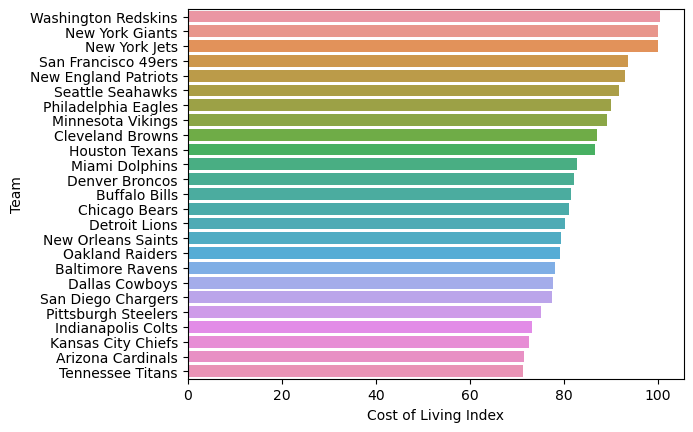

In [28]:
# Ok, let's start by looking at cost of living where each team is from.
team_loc_col = col_2014.merge(team_loc.merge(nat_avg, how='inner', left_on='Team', right_on='Genre'), how='inner', on='City')

sns.barplot(data=team_loc_col, x='Cost of Living Index', y='Team').figure.savefig("avg_col_per_team.png")
# KC Chiefs are 3rd lowest for cost of living, and they were second lowest
# for average price of tickets.


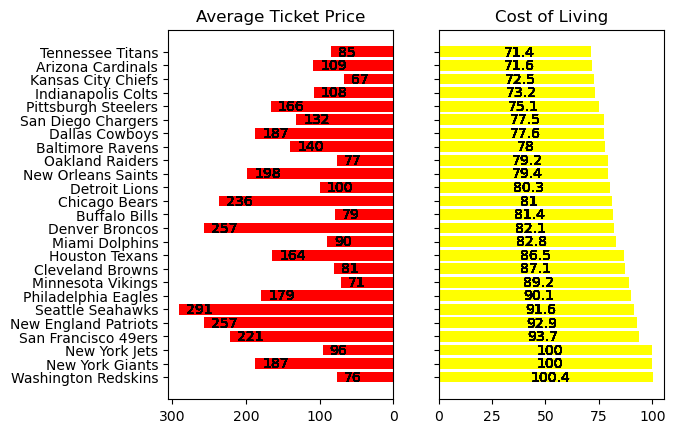

In [29]:
# Now let's see if that trend applies to the other teams.
import matplotlib.pyplot as plt

col = team_loc_col['Cost of Living Index'].tolist()
tp = team_loc_col['Avg TP, $'].tolist()
team = team_loc_col['Team'].tolist()

y = team
x1 = tp
x2 = col

fig, axes = plt.subplots(ncols=2, sharey=True)
p0=axes[0].barh(y, x1, align='center', color='red')
p1=axes[1].barh(y, x2, align='center', color='yellow')
axes[0].invert_xaxis()
axes[0].set(title = 'Average Ticket Price')
axes[1].set(title = 'Cost of Living')
for price in tp:
    axes[0].bar_label(p0, label_type='edge', padding=5)
for cost in col:
    axes[1].bar_label(p1, label_type ='center',color='black',padding=3)
plt.savefig('col_vs_tp.png')
plt.show()
# This doesn't look terribly correlated!
